<a href="https://colab.research.google.com/github/SMSajadi99/Nerual-Network/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

def create_folders():
    # Define the folder names
    folder_names = ['img-tr', 'img-com','img-pos']

    # Check and create folders
    for folder_name in folder_names:
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)
            print(f"Folder '{folder_name}' created.")
        else:
            print(f"Folder '{folder_name}' already exists.")

# Call the function to create folders
create_folders()


Folder 'img-tr' created.
Folder 'img-com' created.
Folder 'img-pos' created.


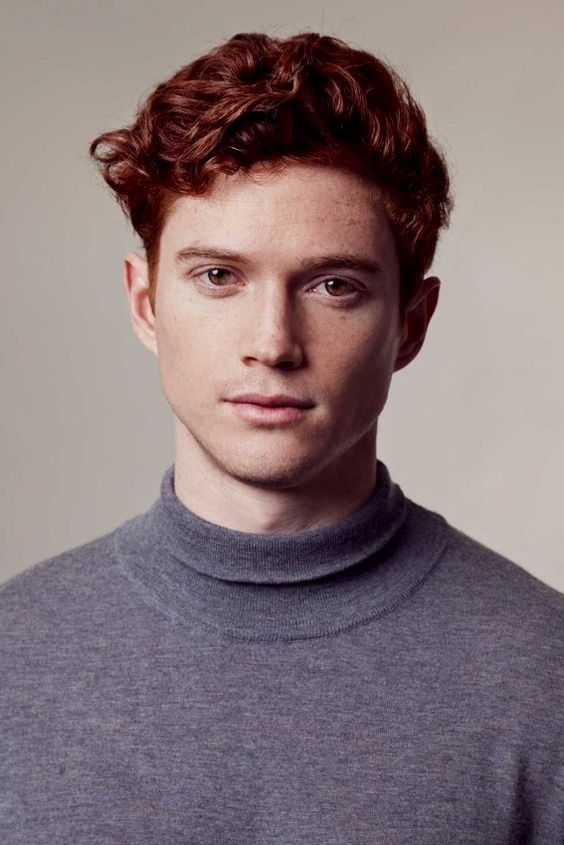

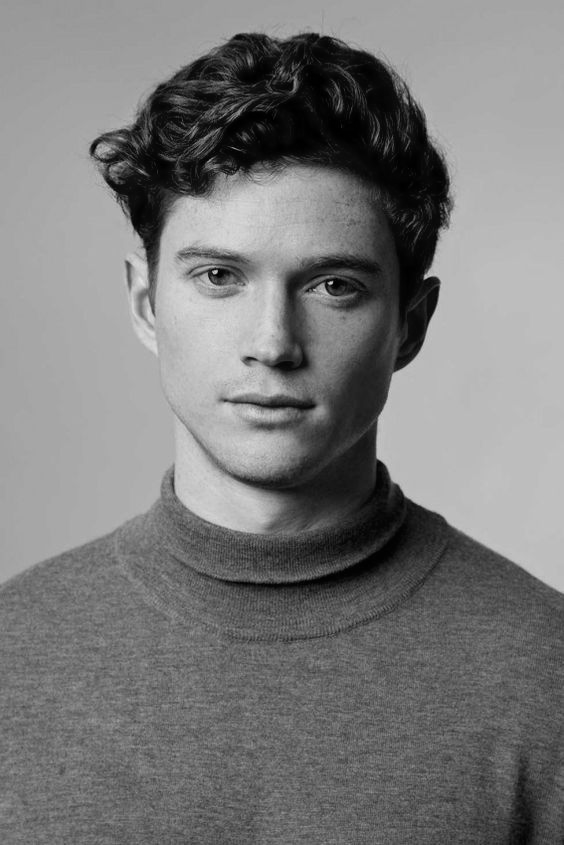

In [2]:
from PIL import Image
from IPython.display import display  # If you're using Jupyter Notebook or IPython

def show_image(image_path):
    try:
        # Open the image file
        img = Image.open(image_path)

        # Convert the image to black and white
        bw_img = img.convert('L')

        # Display the original and black and white images side by side
        display(img)       # Display the original image
        display(bw_img)    # Display the black and white image

        # Save the black and white image (optional)
        bw_img.save('bw_face.jpg')

    except Exception as e:
        print(f"Error: {e}")

# Replace 'face.jpg' with the actual path to your image file
image_path = '/content/face.jpg'

# Call the function to show the images
show_image(image_path)


In [3]:
from PIL import Image
import os

def crop_and_save(image_path, output_folder):
    try:
        # Open the black and white image
        bw_image = Image.open(image_path)

        # Get the size of the image
        width, height = bw_image.size

        # Create folders if they don't exist
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        positions = []

        # Crop the image into 16x16 tiles and save them
        for i in range(0, height, 16):
            for j in range(0, width, 16):
                # Define the crop box
                box = (j, i, j + 16, i + 16)

                # Crop the image
                cropped_tile = bw_image.crop(box)

                # Generate a unique name based on position
                tile_name = f"tile_{i // 16}_{j // 16}.jpg"
                tile_path = os.path.join(output_folder, tile_name)

                # Save the cropped image
                cropped_tile.save(tile_path)

                # Save position information
                positions.append((tile_name, box))

        # Save position information to a file
        pos_file_path = os.path.join("img-pos", "positions.txt")
        with open(pos_file_path, "w") as pos_file:
            for tile_name, box in positions:
                pos_file.write(f"{tile_name}: {box}\n")

        print(f"{len(positions)} tiles saved to {output_folder}")
        print(f"Position information saved to {pos_file_path}")

    except Exception as e:
        print(f"An error occurred: {e}")

# Specify the input image and output folder
input_image_path = 'bw_face.jpg'
output_folder = 'img-tr'

# Call the function to crop and save the tiles
crop_and_save(input_image_path, output_folder)


1908 tiles saved to img-tr
Position information saved to img-pos/positions.txt


In [4]:
from PIL import Image
import numpy as np

def calculate_average(image_path):
    try:
        # Open the black and white image
        bw_image = Image.open(image_path)

        # Convert image to numpy array for efficient calculations
        bw_array = np.array(bw_image)

        # Calculate the average pixel value
        average_value = np.mean(bw_array)

        print(f"Average pixel value: {average_value}")

        return average_value

    except Exception as e:
        print(f"An error occurred: {e}")

# Specify the input image
input_image_path = 'bw_face.jpg'

# Call the function to calculate the average
average_value = calculate_average(input_image_path)


Average pixel value: 121.92081077678459


In [5]:
from PIL import Image
import numpy as np
import os

def subtract_average(input_folder, output_folder, average_value):
    try:
        # Create output folder if it doesn't exist
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        # Get a list of all files in the input folder
        input_files = os.listdir(input_folder)

        for file_name in input_files:
            if file_name.endswith(".jpg"):
                # Open the black and white image
                bw_image = Image.open(os.path.join(input_folder, file_name))

                # Convert image to numpy array for efficient calculations
                bw_array = np.array(bw_image, dtype=np.float32)

                # Subtract the average value
                subtracted_array = bw_array - average_value

                # Clip values to be within 0-255 range
                subtracted_array = np.clip(subtracted_array, 0, 255)

                # Convert the array to uint8
                subtracted_array = subtracted_array.astype(np.uint8)

                # Create a new image with the subtracted values
                subtracted_image = Image.fromarray(subtracted_array)

                # Save the subtracted image to the output folder
                output_path = os.path.join(output_folder, file_name)
                subtracted_image.save(output_path)

        print(f"Subtracted images saved to {output_folder}")

    except Exception as e:
        print(f"An error occurred: {e}")

# Specify the input and output folders
input_folder = 'img-tr'
output_folder = 'img-com'

# Call the function to subtract the average value and save the images
subtract_average(input_folder, output_folder, average_value)


Subtracted images saved to img-com


In [6]:
import os
from PIL import Image

def compare_folders(img_tr_folder, img_com_folder):
    try:
        tr_files = os.listdir(img_tr_folder)
        com_files = os.listdir(img_com_folder)

        tr_files_set = set(tr_files)
        com_files_set = set(com_files)

        common_files = tr_files_set.intersection(com_files_set)

        for file_name in common_files:
            tr_image_path = os.path.join(img_tr_folder, file_name)
            com_image_path = os.path.join(img_com_folder, file_name)

            # Check dimensions
            tr_image = Image.open(tr_image_path)
            com_image = Image.open(com_image_path)

            tr_dimensions = tr_image.size
            com_dimensions = com_image.size

            if tr_dimensions != com_dimensions:
                print(f"Files in 'img-tr' and 'img-com' have different dimensions.")
                return

        print("All files in 'img-tr' and 'img-com' have the same dimensions.")

    except Exception as e:
        print(f"An error occurred: {e}")

# Specify the folders to compare
img_tr_folder = 'img-tr'
img_com_folder = 'img-com'

# Call the function to compare the folders
compare_folders(img_tr_folder, img_com_folder)


All files in 'img-tr' and 'img-com' have the same dimensions.


In [7]:
from PIL import Image
import os

def reconstruct_image(input_folder, pos_folder, output_path):
    try:
        # Get a list of all files in the input folder
        input_files = os.listdir(input_folder)

        # Create a blank canvas to reconstruct the image
        canvas_width = 0
        canvas_height = 0

        # Dictionary to store positions
        positions = {}

        # Read position information from the 'img-pos' folder
        pos_file_path = os.path.join(pos_folder, "positions.txt")

        with open(pos_file_path, "r") as pos_file:
            for line in pos_file:
                parts = line.strip().split(':')
                if len(parts) == 2:
                    tile_name = parts[0].strip()
                    position_str = parts[1].strip()
                    positions[tile_name] = eval(position_str)

                    # Update canvas size based on position information
                    canvas_width = max(canvas_width, positions[tile_name][2])
                    canvas_height = max(canvas_height, positions[tile_name][3])

        # Create a blank canvas
        canvas = Image.new("L", (canvas_width, canvas_height), color=255)

        # Place cropped tiles on the canvas based on positions
        for file_name in input_files:
            if file_name.endswith(".jpg"):
                tile_path = os.path.join(input_folder, file_name)

                # Get position information for the tile
                position = positions.get(file_name, None)

                if position:
                    x, y, x_end, y_end = position

                    # Open the cropped tile
                    tile_image = Image.open(tile_path)

                    # Paste the tile onto the canvas
                    canvas.paste(tile_image, (x, y, x_end, y_end))

        # Save the reconstructed image
        canvas.save(output_path)

        # Display the reconstructed image
        canvas.show()

        print(f"Reconstructed image saved to {output_path}")

    except Exception as e:
        print(f"An error occurred: {e}")

# Specify the input and position folders, and the output path
img_tr_folder = 'img-tr'
img_pos_folder = 'img-pos'
output_image_path = 'reconstructed_image.jpg'

# Call the function to reconstruct and display the image
reconstruct_image(img_tr_folder, img_pos_folder, output_image_path)


Reconstructed image saved to reconstructed_image.jpg


In [8]:
from PIL import Image
import os

def reconstruct_image(input_folder, pos_folder, output_path):
    try:
        # Get a list of all files in the input folder
        input_files = os.listdir(input_folder)

        # Create a blank canvas to reconstruct the image
        canvas_width = 0
        canvas_height = 0

        # Dictionary to store positions
        positions = {}

        # Read position information from the 'img-pos' folder
        pos_file_path = os.path.join(pos_folder, "positions.txt")

        with open(pos_file_path, "r") as pos_file:
            for line in pos_file:
                parts = line.strip().split(':')
                if len(parts) == 2:
                    tile_name = parts[0].strip()
                    position_str = parts[1].strip()
                    positions[tile_name] = eval(position_str)

                    # Update canvas size based on position information
                    canvas_width = max(canvas_width, positions[tile_name][2])
                    canvas_height = max(canvas_height, positions[tile_name][3])

        # Create a blank canvas
        canvas = Image.new("L", (canvas_width, canvas_height), color=255)

        # Place processed images on the canvas based on positions
        for file_name in input_files:
            if file_name.endswith(".jpg"):
                tile_path = os.path.join(input_folder, file_name)

                # Get position information for the tile
                position = positions.get(file_name, None)

                if position:
                    x, y, x_end, y_end = position

                    # Open the processed image
                    tile_image = Image.open(tile_path)

                    # Paste the image onto the canvas
                    canvas.paste(tile_image, (x, y, x_end, y_end))

        # Save the reconstructed image
        canvas.save(output_path)

        # Display the reconstructed image
        canvas.show()

        print(f"Reconstructed image saved to {output_path}")

    except Exception as e:
        print(f"An error occurred: {e}")

# Specify the input and position folders, and the output path
img_com_folder = 'img-com'
img_pos_folder = 'img-pos'
output_image_path = 'reconstructed_com_image.jpg'

# Call the function to reconstruct and display the image
reconstruct_image(img_com_folder, img_pos_folder, output_image_path)


Reconstructed image saved to reconstructed_com_image.jpg


# Train Feedforward

In [9]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers, callbacks

# Function to load and preprocess images
def load_and_preprocess(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((16, 16))  # Resize to 16x16
    img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    return img_array

# Function to load and preprocess images from the 'img-com' and 'img-tr' folders
def load_data(img_com_folder, img_tr_folder):
    X = []  # Input images from 'img-com' folder
    y = []  # Output images from 'img-tr' folder

    com_files = os.listdir(img_com_folder)
    tr_files = os.listdir(img_tr_folder)

    for com_file in com_files:
        if com_file.endswith(".jpg"):
            com_image_path = os.path.join(img_com_folder, com_file)
            tr_image_path = os.path.join(img_tr_folder, com_file)

            com_img = load_and_preprocess(com_image_path)
            tr_img = load_and_preprocess(tr_image_path)

            X.append(com_img)
            y.append(tr_img)

    return np.array(X), np.array(y)

# Load data
img_com_folder = 'img-com'
img_tr_folder = 'img-tr'
X, y = load_data(img_com_folder, img_tr_folder)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a more complex MLP model with a Dense output layer
model = models.Sequential([
    layers.Flatten(input_shape=(16, 16)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(16 * 16, activation='sigmoid'),  # Direct output layer
    layers.Reshape((16, 16))
])

# Compile the model with a lower learning rate
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')

# Use EarlyStopping to stop training if the validation loss stops improving
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model for more epochs
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Save the trained model
model.save('image_translation_model_16x16.h5')


Epoch 1/50
48/48 [==============================] - 2s 18ms/step - loss: 0.0510 - val_loss: 0.0512
Epoch 2/50
48/48 [==============================] - 1s 13ms/step - loss: 0.0449 - val_loss: 0.0439
Epoch 3/50
48/48 [==============================] - 1s 12ms/step - loss: 0.0409 - val_loss: 0.0412
Epoch 4/50
48/48 [==============================] - 0s 8ms/step - loss: 0.0380 - val_loss: 0.0378
Epoch 5/50
48/48 [==============================] - 0s 9ms/step - loss: 0.0333 - val_loss: 0.0314
Epoch 6/50
48/48 [==============================] - 0s 8ms/step - loss: 0.0266 - val_loss: 0.0234
Epoch 7/50
48/48 [==============================] - 0s 8ms/step - loss: 0.0210 - val_loss: 0.0183
Epoch 8/50
48/48 [==============================] - 0s 9ms/step - loss: 0.0184 - val_loss: 0.0162
Epoch 9/50
48/48 [==============================] - 0s 8ms/step - loss: 0.0168 - val_loss: 0.0155
Epoch 10/50
48/48 [==============================] - 0s 9ms/step - loss: 0.0165 - val_loss: 0.0150
Epoch 11/50
48/4

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model

# Function to load and preprocess a single image
def load_and_preprocess(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((16, 16))  # Resize to 16x16
    img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    return img_array

# Function to perform the test process and save output images
def test_and_save_results(img_com_folder, model, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    com_files = os.listdir(img_com_folder)

    for com_file in com_files:
        if com_file.endswith(".jpg"):
            com_image_path = os.path.join(img_com_folder, com_file)

            # Load and preprocess the input image
            com_img = load_and_preprocess(com_image_path)

            # Perform prediction using the trained model
            output_img = model.predict(np.expand_dims(com_img, axis=0))  # Add an extra dimension

            # Reshape output to image dimensions
            output_img = output_img.reshape((16, 16)) * 255.0

            # Convert to PIL Image
            output_pil = Image.fromarray(output_img.astype('uint8'))

            # Save the output image to the 'final_result' folder
            output_path = os.path.join(output_folder, f'result_{com_file}')
            output_pil.save(output_path)

    print(f"Test process completed. Output images saved to {output_folder}")

# Load the trained model
model = load_model('image_translation_model_16x16.h5')

# Specify the 'img-com' folder and the output folder
img_com_folder = 'img-com'
output_folder = 'final_result'

# Perform the test process and save the output images
test_and_save_results(img_com_folder, model, output_folder)


1/1 [==============================] - 0s 38ms/step
Test process completed. Output images saved to final_result


In [11]:
import os
from PIL import Image

def reconstruct_output_images(final_result_folder, img_pos_folder, output_folder):
    try:
        # Get a list of all files in the final result folder
        result_files = os.listdir(final_result_folder)

        # Create a blank canvas to reconstruct the image
        canvas_width = 0
        canvas_height = 0

        # Dictionary to store positions
        positions = {}

        # Read position information from the 'img-pos' folder
        pos_file_path = os.path.join(img_pos_folder, "positions.txt")

        with open(pos_file_path, "r") as pos_file:
            for line in pos_file:
                parts = line.strip().split(':')
                if len(parts) == 2:
                    tile_name = parts[0].strip()
                    position_str = parts[1].strip()
                    positions[tile_name] = eval(position_str)

                    # Update canvas size based on position information
                    canvas_width = max(canvas_width, positions[tile_name][2])
                    canvas_height = max(canvas_height, positions[tile_name][3])

        # Create a blank canvas
        canvas = Image.new("L", (canvas_width, canvas_height), color=255)

        # Place output images on the canvas based on positions
        for result_file in result_files:
            if result_file.startswith("result_") and result_file.endswith(".jpg"):
                result_image_path = os.path.join(final_result_folder, result_file)

                # Get position information for the output image
                tile_name = result_file.replace("result_", "")
                position = positions.get(tile_name, None)

                if position:
                    x, y, x_end, y_end = position

                    # Open the output image
                    result_image = Image.open(result_image_path)

                    # Paste the image onto the canvas
                    canvas.paste(result_image, (x, y, x_end, y_end))

        # Save the reconstructed image
        canvas.save(output_folder)

        # Display the reconstructed image
        canvas.show()

        print(f"Reconstructed image saved to {output_folder}")

    except Exception as e:
        print(f"An error occurred: {e}")

# Specify the 'final_result' folder, 'img-pos' folder, and the output path
final_result_folder = 'final_result'
img_pos_folder = 'img-pos'
output_image_path = 'reconstructed_final_image_16x16.jpg'

# Call the function to reconstruct and display the final image
reconstruct_output_images(final_result_folder, img_pos_folder, output_image_path)


Reconstructed image saved to reconstructed_final_image_16x16.jpg


In [12]:
import cv2
import numpy as np

def calculate_psnr(original_image, reconstructed_image):
    # Read images
    img1 = cv2.imread(original_image)
    img2 = cv2.imread(reconstructed_image)

    # Resize images to have the same dimensions
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

    # Convert images to float32
    img1 = img1.astype(np.float32)
    img2 = img2.astype(np.float32)

    # Calculate mean squared error
    mse = np.mean((img1 - img2) ** 2)

    # If MSE is zero, PSNR is infinity
    if mse == 0:
        return float('inf')

    # Calculate PSNR
    max_pixel_value = 255.0
    psnr = 20 * np.log10(max_pixel_value / np.sqrt(mse))

    return psnr

# Example usage
original_image_path = '/content/bw_face.jpg'
reconstructed_image_path = '/content/reconstructed_final_image_16x16.jpg'

psnr_value = calculate_psnr(original_image_path, reconstructed_image_path)
print(f"PSNR value: {psnr_value} dB")


PSNR value: 17.433261077801248 dB


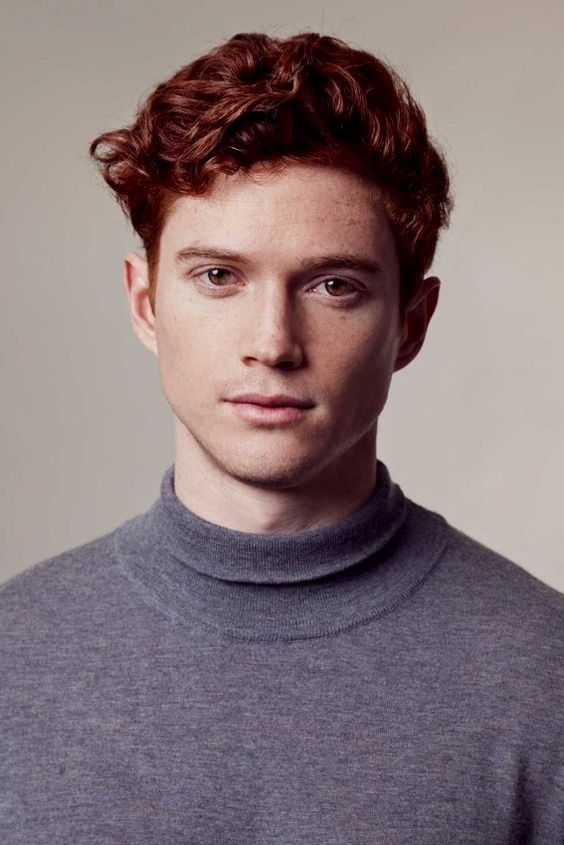

Title: RGB image



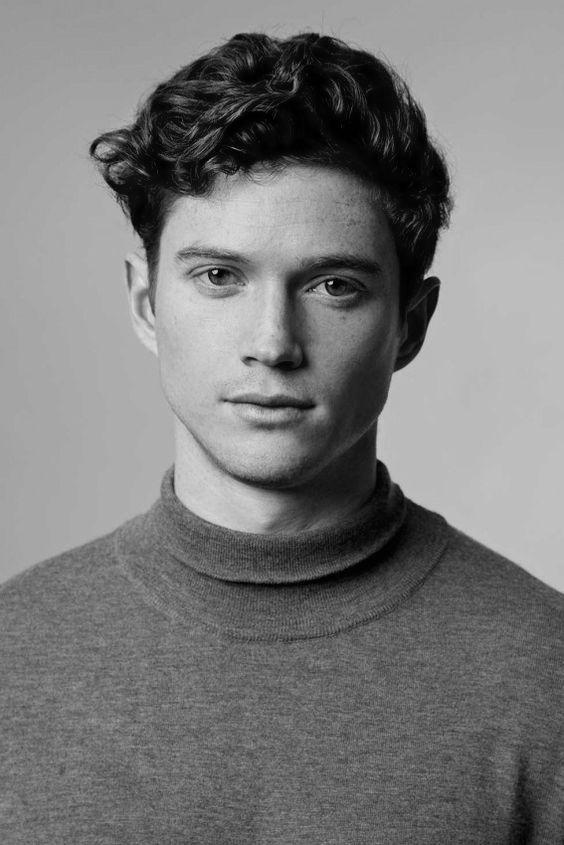

Title: Gray Image



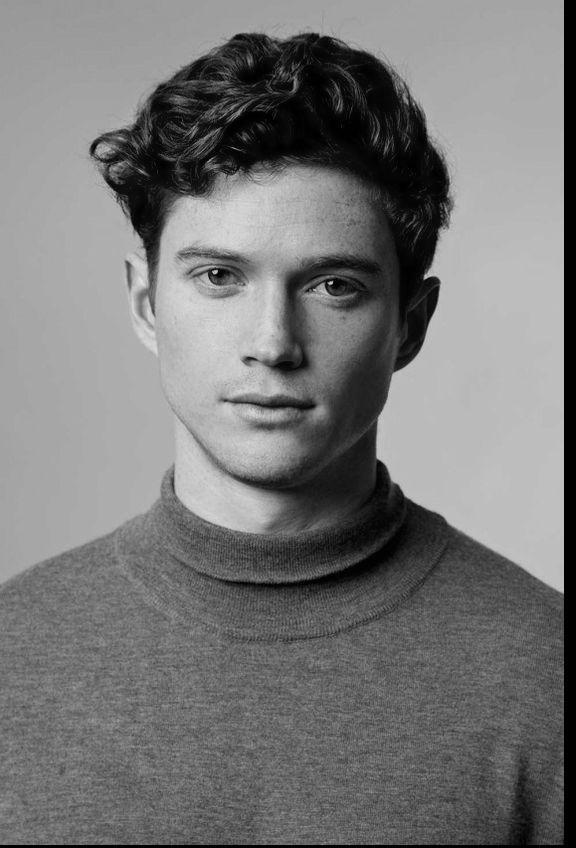

Title: Gray photo frames



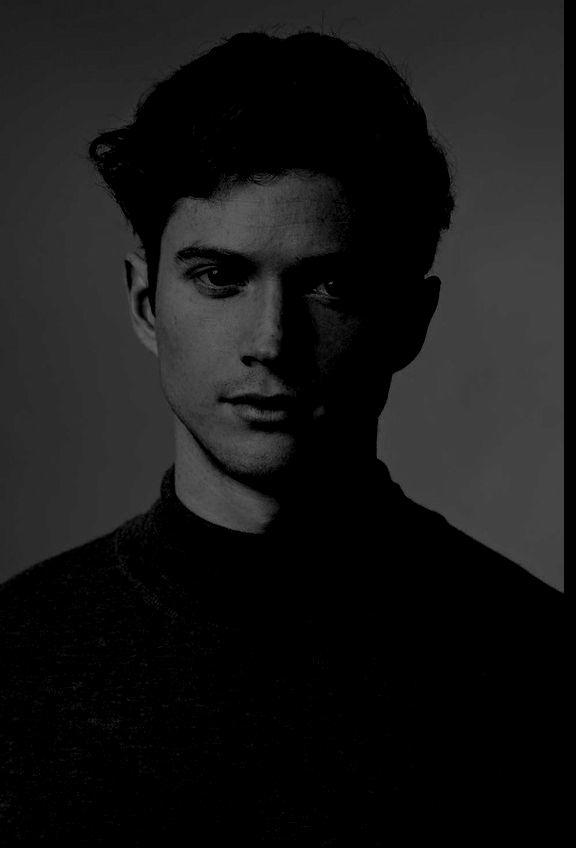

Title: Gray compact photo frames



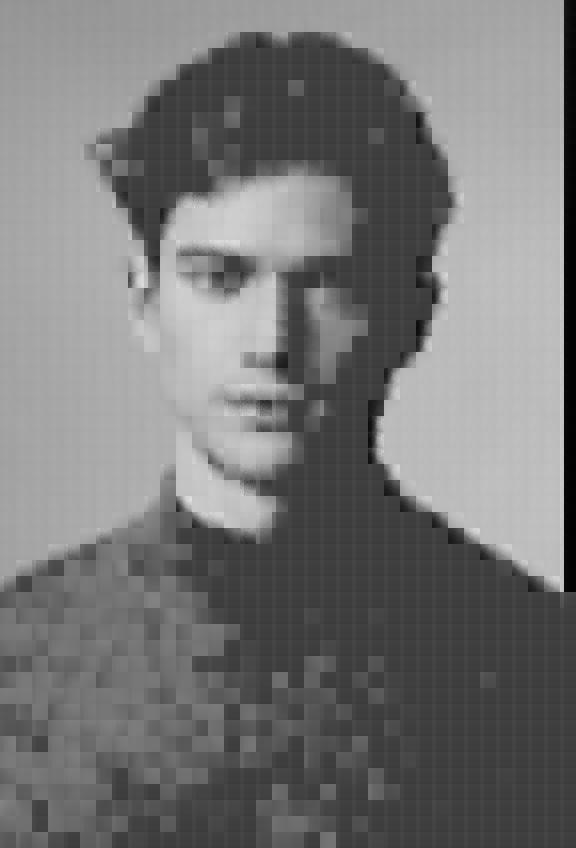

Title: reconstructed final image 16x16



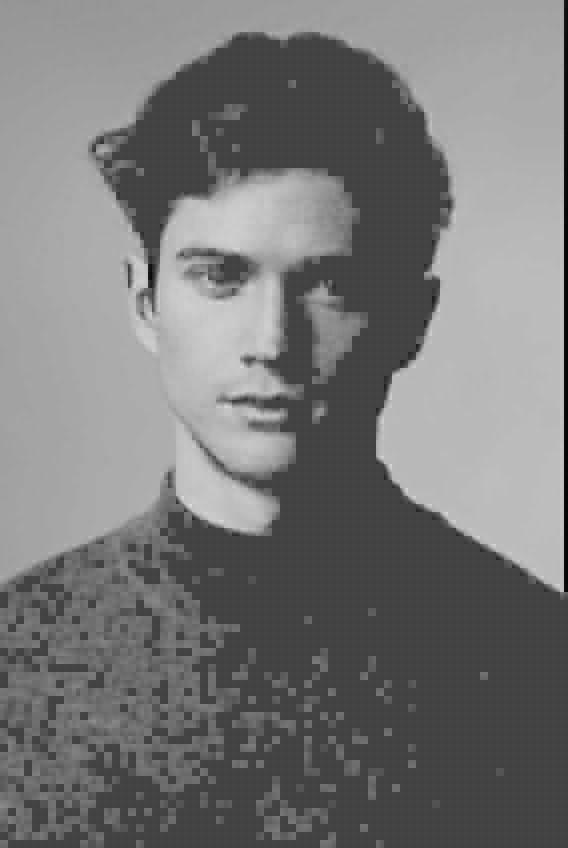

Title: reconstructed final image 8x8



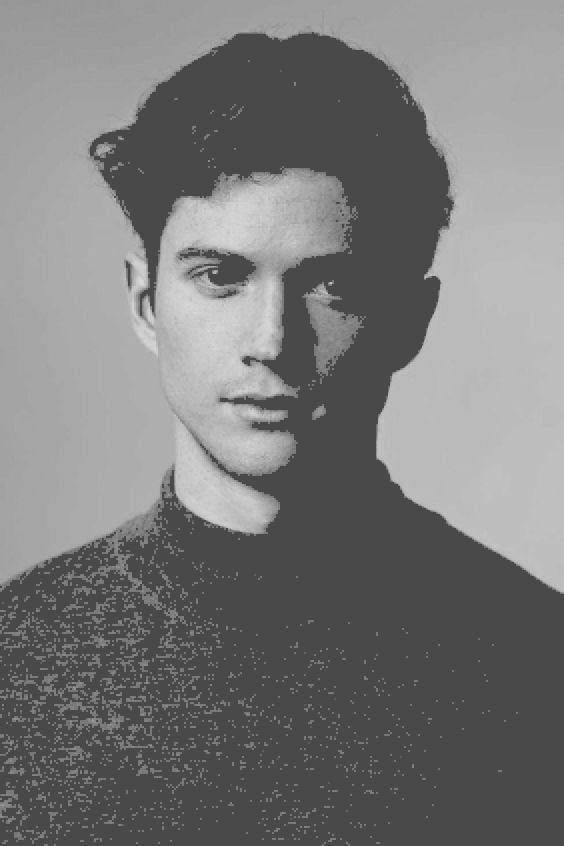

Title: reconstructed final image 2x2



In [16]:
from PIL import Image
from IPython.display import display

# Replace these file paths with the actual paths of your photos
photo_paths = ["/content/face.jpg", "/content/bw_face.jpg", "/content/reconstructed_image.jpg",
               "/content/reconstructed_com_image.jpg", "/content/reconstructed_final_image_16x16.jpg", "/content/reconstructed_final_image_8x8.jpg",
               "/content/reconstructed_final_image_2x2.jpg"]

# Titles for each photo
photo_titles = [
    "RGB image",
    "Gray Image",
    "Gray photo frames",
    "Gray compact photo frames",
    "reconstructed final image 16x16",
    "reconstructed final image 8x8",
    "reconstructed final image 2x2",
]

# Display photos with titles
for path, title in zip(photo_paths, photo_titles):
    img = Image.open(path)
    display(img)
    print(f"Title: {title}\n")


